Need to mount the drive to acess the dataset since the dataset is large.

In [ ]:
!pip install python_speech_features

###Imports and Load data

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import seaborn as sns
import librosa.display
import librosa

import os
import math
import pickle
import random
import operator


import math
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Additional libraries for data preprocessing and visualization
import cv2
from sklearn.model_selection import train_test_split


In [ ]:
!wget https://raw.githubusercontent.com/GDG-IGDTUW/AI-ML-2/main/Music%20Genre%20Classification/features_3_sec.csv


--2025-02-03 17:48:40--  https://raw.githubusercontent.com/GDG-IGDTUW/AI-ML-2/main/Music%20Genre%20Classification/features_3_sec.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11075018 (11M) [text/plain]
Saving to: ‘features_3_sec.csv.4’

features_3_sec.csv. 100%[===================>]  10.56M  --.-KB/s    in 0.04s   

2025-02-03 17:48:41 (288 MB/s) - ‘features_3_sec.csv.4’ saved [11075018/11075018]



In [ ]:
data = pd.read_csv('features_3_sec.csv')


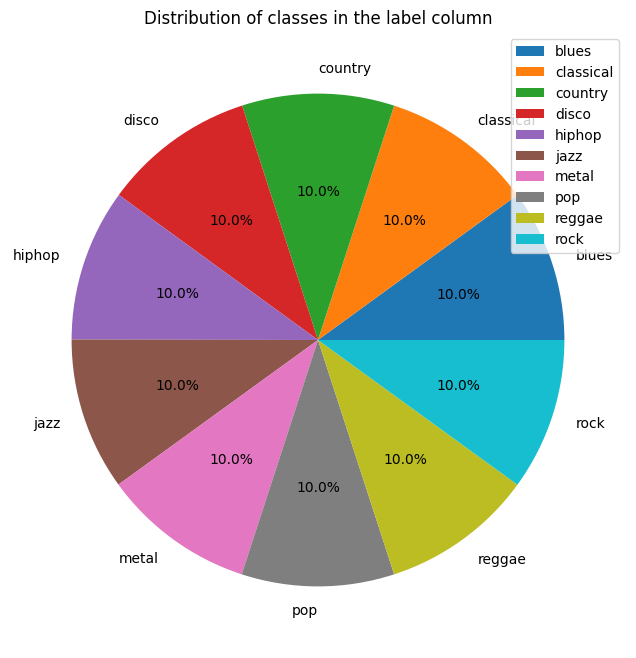

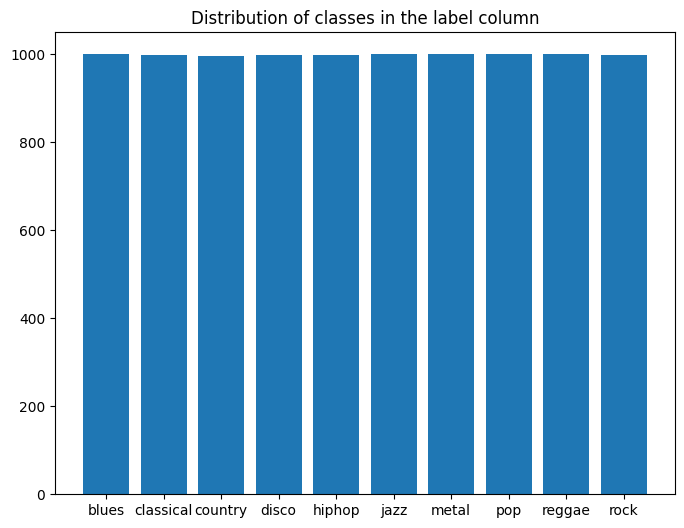

In [ ]:
#visualize the distribution of classes in the label column
count = [] #count of each data value
labels = data['label'].unique() #distinct label values

for i in labels:
  count.append(data[data['label']==i]['label'].count()) #storing count and labels in same order

#pie chart
plt.figure(figsize=(8, 8)) #size of figure
plt.pie(count, labels = labels,autopct='%1.1f%%') #pie chart labels and corresponding values
plt.title('Distribution of classes in the label column') #title of pie chart
plt.legend() #displays the legend
plt.show() #displays the pie chart

#bar plot
plt.figure(figsize=(8, 6)) #size of figure
plt.bar(labels, count) #(x axis, y axis)
plt.title('Distribution of classes in the label column') # title of bar plot
plt.show() #displays the graph



### Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
scaled_df = pd.DataFrame(np_scaled, columns = cols)
scaled_df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [ ]:
# Assuming X contains your features and y contains the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
# Train the model
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
# Evaluate the model
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       blues       0.88      0.85      0.86       208
   classical       0.91      0.99      0.95       203
     country       0.76      0.82      0.79       186
       disco       0.84      0.87      0.85       199
      hiphop       0.94      0.87      0.90       218
        jazz       0.85      0.90      0.87       192
       metal       0.89      0.96      0.93       204
         pop       0.94      0.93      0.94       180
      reggae       0.87      0.89      0.88       211
        rock       0.88      0.69      0.77       197

    accuracy                           0.87      1998
   macro avg       0.88      0.87      0.87      1998
weighted avg       0.88      0.87      0.87      1998



<ipython-input-61-e7f1ac455952>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_importances, palette="viridis")


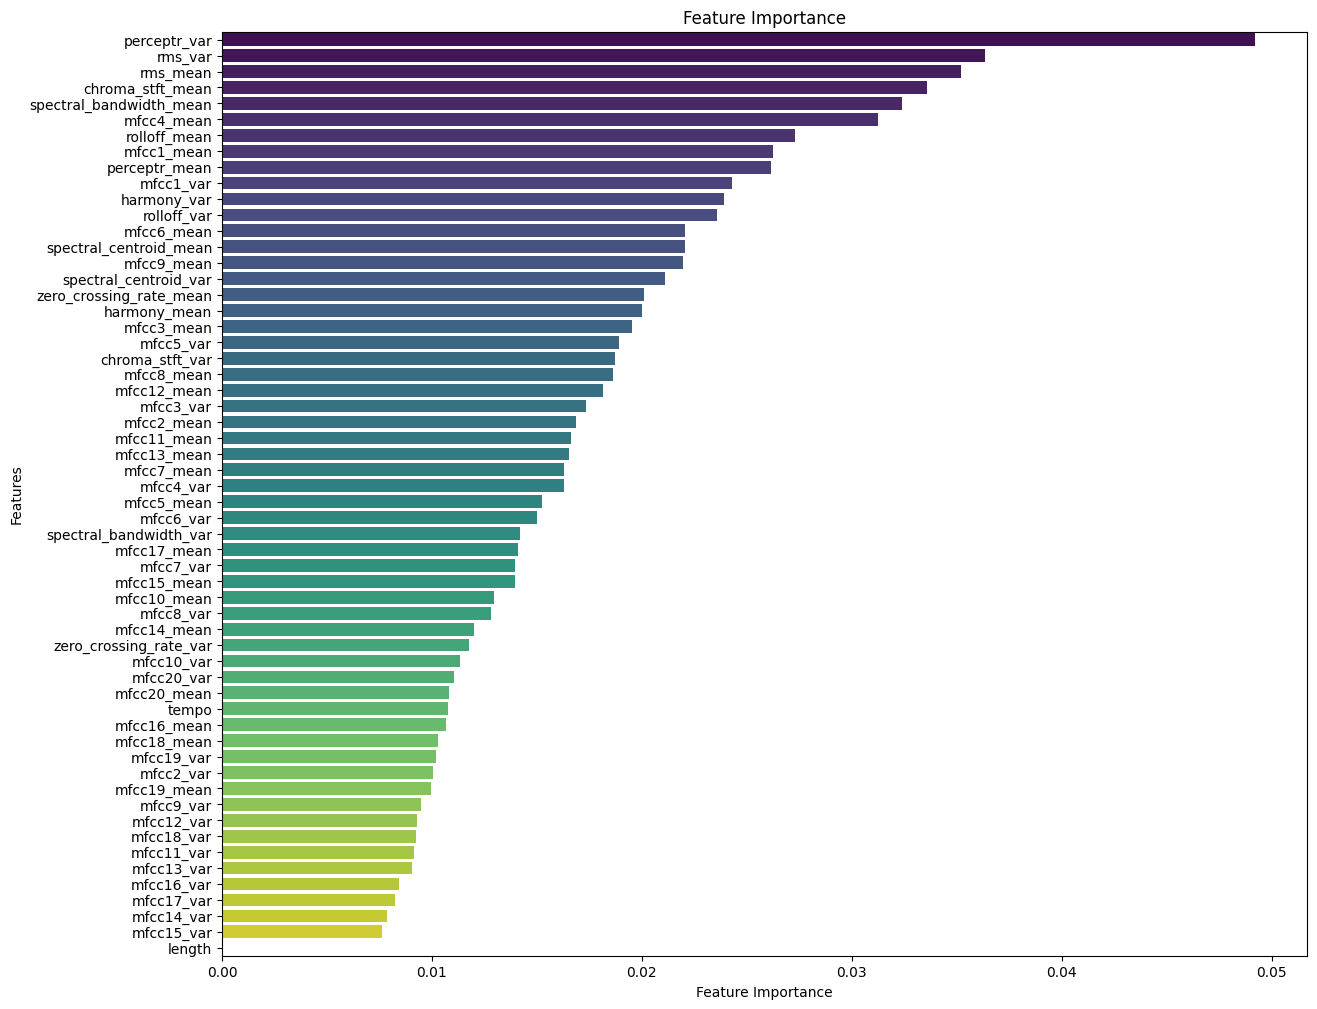

In [ ]:
#Visualize Feature Importances #24
#added
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})


feature_importances=feature_importances.sort_values(by="importance" ,ascending =False)

#plot

plt.figure(figsize=(14,12))
sns.barplot(x="importance", y="feature", data=feature_importances, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

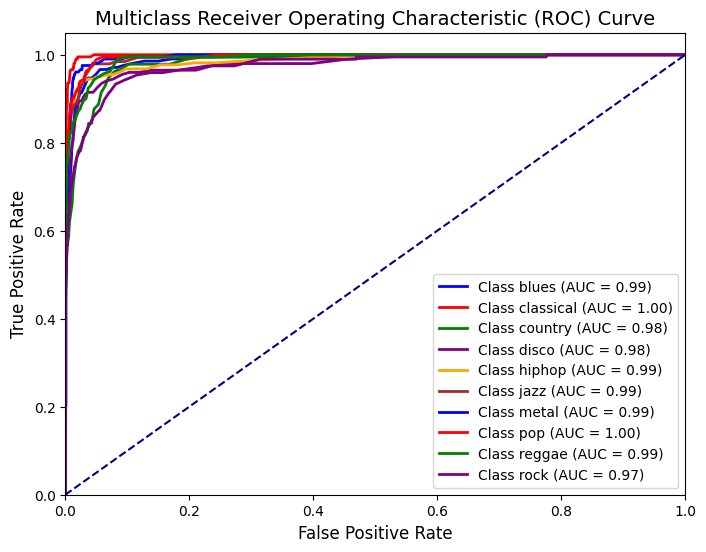

In [ ]:
#Create a function to plot the ROC curve for the model. #29
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def plot_multiclass_roc(model, X_test, y_test, class_labels):

    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=class_labels)
    n_classes = y_test_bin.shape[1]

    # Get predicted probabilities
    y_probs = model.predict_proba(X_test)

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
                 label=f"Class {class_labels[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

    # Labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title("Multiclass Receiver Operating Characteristic (ROC) Curve", fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

class_labels = np.unique(y_test)

# Call the function
plot_multiclass_roc(rf_model, X_test, y_test, class_labels)

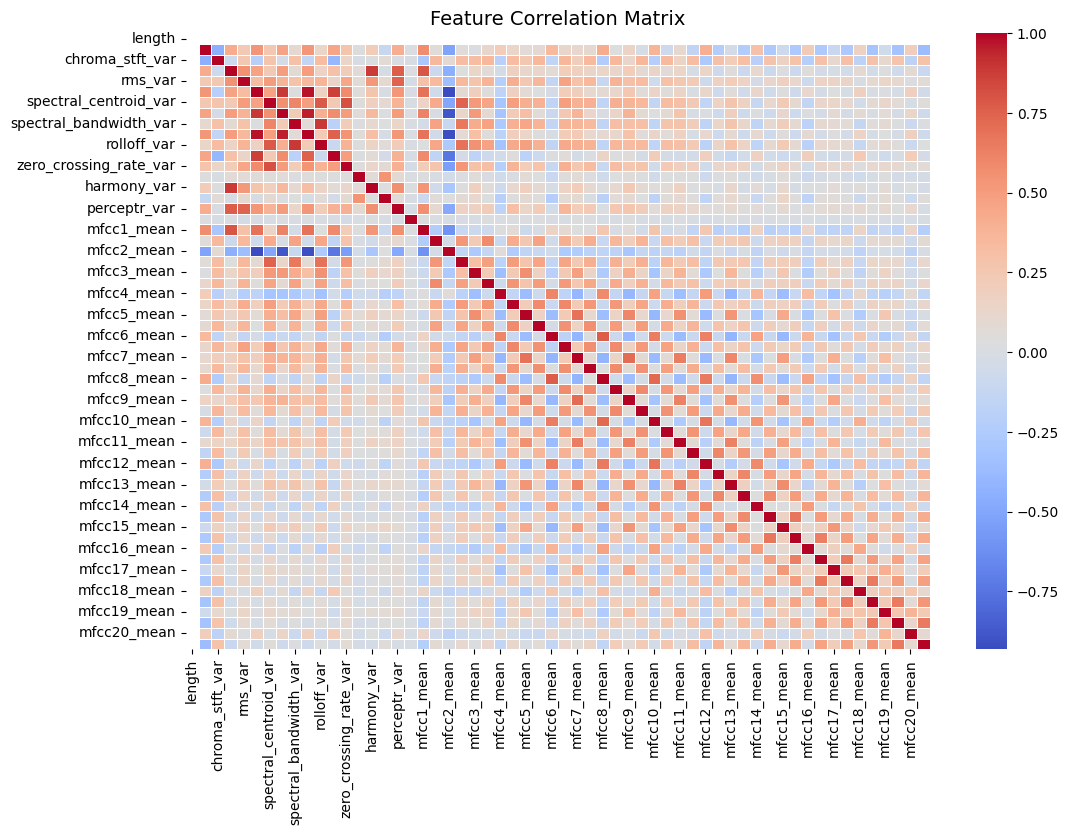

In [ ]:
#Use sns.heatmap to visualize the correlation matrix of features in the dataset. #31

import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 8))
    correlation_matrix = data.corr()

    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Matrix", fontsize=14)
    plt.show()

plot_correlation_matrix(X)


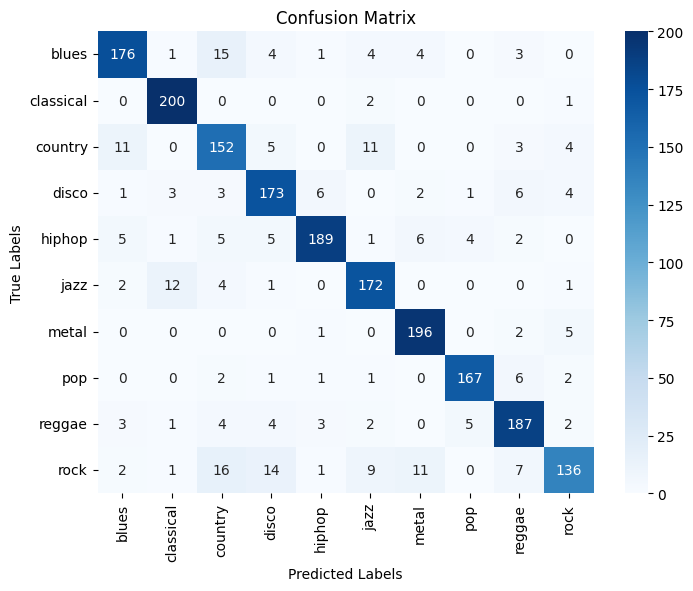

In [ ]:
#Visualize the Confusion Matrix #25

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_labels):

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

class_labels = y.unique()
plot_confusion_matrix(y_test, y_pred, class_labels)


Grid Search For Hyperparameter Tuning

In [ ]:
 from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Instead of [100, 200, 300]
    'max_depth': [None, 10],     # Instead of [None, 10, 20, 30]
    'min_samples_split': [2, 5], # Instead of [2, 5, 10]
    'min_samples_leaf': [1, 2],  # Instead of [1, 2, 4]
    'max_features': ['sqrt']     # Instead of ['sqrt', 'log2']
}
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print progress
)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test)

# Classification report
class_report_best = classification_report(y_test, y_pred_best)
print("\nClassification Report with Best Model:")
print(class_report_best)

# Confusion matrix
plot_confusion_matrix(y_test, y_pred_best, class_labels)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:337: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



Classification Report with Calibrated Model:
              precision    recall  f1-score   support

       blues       0.90      0.87      0.88       208
   classical       0.94      0.98      0.96       203
     country       0.77      0.83      0.80       186
       disco       0.85      0.87      0.86       199
      hiphop       0.95      0.89      0.91       218
        jazz       0.86      0.92      0.89       192
       metal       0.92      0.95      0.93       204
         pop       0.91      0.93      0.92       180
      reggae       0.90      0.90      0.90       211
        rock       0.87      0.74      0.80       197

    accuracy                           0.89      1998
   macro avg       0.89      0.89      0.88      1998
weighted avg       0.89      0.89      0.89      1998



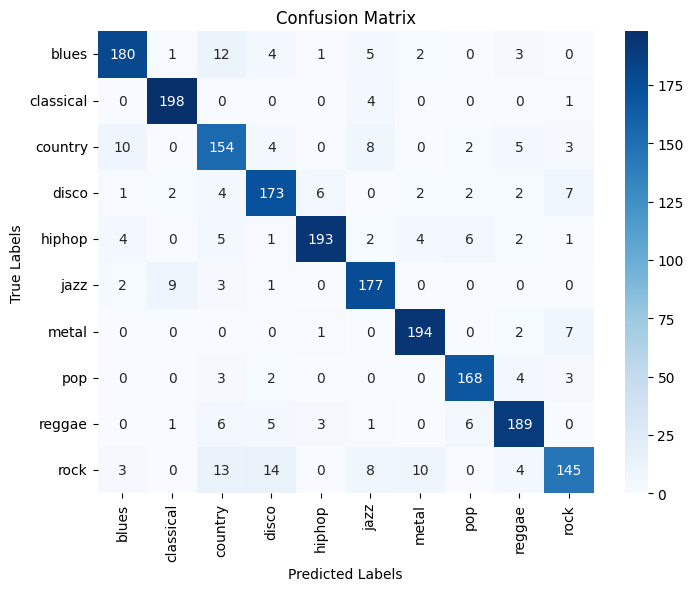

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# Feature scaling (optional, but can improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],  # Instead of [100, 200, 300]
    'max_depth': [None, 10],     # Instead of [None, 10, 20, 30]
    'min_samples_split': [2, 5], # Instead of [2, 5, 10]
    'min_samples_leaf': [1, 2],  # Instead of [1, 2, 4]
    'max_features': ['sqrt']     # Instead of ['sqrt', 'log2']
}

# Initialize the Random Forest model with class weight balance
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print progress
)

# Fit the model on scaled data
grid_search.fit(X_train_scaled, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Get the best model
best_rf_model = grid_search.best_estimator_
# Apply probability calibration
calibrated_model = CalibratedClassifierCV(best_rf_model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train_scaled, y_train)
# Evaluate the best calibrated model on the test set
y_pred_best = calibrated_model.predict(X_test_scaled)
# Classification report
class_report_best = classification_report(y_test, y_pred_best)
print("\nClassification Report with Calibrated Model:")
print(class_report_best)
# Confusion matrix
plot_confusion_matrix(y_test, y_pred_best, grid_search.classes_)
